In [1]:
from utils import *
import os
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rcParams
import baltic as bt
rcParams['font.family'] = 'Helvetica'
%matplotlib inline

# Root height comparisons

Untransformed trees
	SC1.SC1_NRR31.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR30.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR1.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR2.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR3.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR5.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR4.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR7.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR6.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR29.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR28.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR19.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR18.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR9.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR8.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR25.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR12.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR24.burninCombinedResampled.more.mcc.tree
	SC1.SC1_NRR13.burninCombinedResamp

<Figure size 640x480 with 0 Axes>

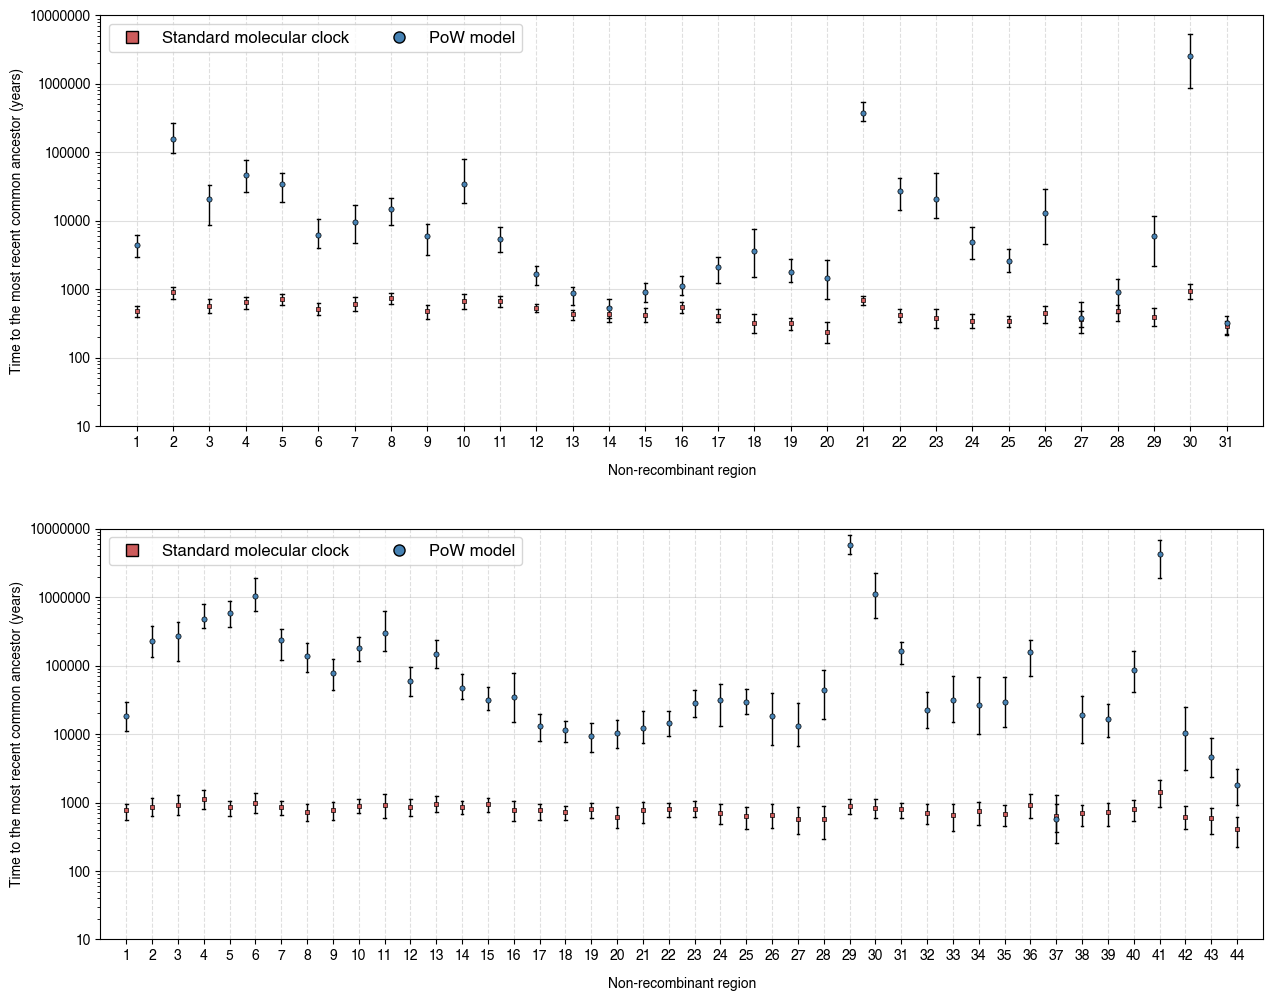

In [2]:
def get_tree_heights(transformed_dir, untransformed_dir):
    '''plot the height of each tree for each NRR 
    for the untransformed and transformed trees'''

    # get the tree heights for each NRR
    untransformed_tree_heights = {}
    transformed_tree_heights = {}
    
    print('Untransformed trees')
    for file in os.listdir(untransformed_dir):
        if not file.endswith('tree') and not file.endswith('tre'):
            continue
        print('\t' + file)
        nrr = int(re.search(r'NRR(\d+)', file).group(1))  # Use raw string
        tree = bt.loadNexus(os.path.join(untransformed_dir, file), absoluteTime=False)

        untransformed_tree_heights[nrr] = {}
        untransformed_tree_heights[nrr]['height_median'] = tree.root.traits['height_median']
        untransformed_tree_heights[nrr]['95%_HPD'] = tree.root.traits['height_95%_HPD']
    
    print('Transformed trees')
    for file in os.listdir(transformed_dir):
        if not file.endswith('tree') and not file.endswith('tre'):
            continue
        print('\t' + file)
        nrr = int(re.search(r'NRR(\d+)', file).group(1))  # Use raw string
        tree = bt.loadNexus(os.path.join(transformed_dir, file), absoluteTime=False)
        transformed_tree_heights[nrr] = {}
        transformed_tree_heights[nrr]['height_median'] = tree.root.traits['height_median']
        transformed_tree_heights[nrr]['95%_HPD'] = tree.root.traits['height_95%_HPD']

    return untransformed_tree_heights, transformed_tree_heights



def plot_tree_heights(untransformed_tree_heights, transformed_tree_heights, ax, letter=None):
    '''plot of the height for each NRR for the 
    untransformed and transformed trees'''
    
    # fig, ax = plt.subplots(figsize=(15,5))
    for index, nrr in enumerate(untransformed_tree_heights.keys()):
        ax.scatter(nrr, untransformed_tree_heights[nrr]['height_median'], color='indianred', marker='s', s=12, edgecolors='black', linewidth=0.5, zorder=100, label='Standard molecular clock')
        ax.scatter(nrr, transformed_tree_heights[nrr]['height_median'], color='steelblue', marker='o', s=14, edgecolors='black', linewidth=0.5, zorder=100, label='PoW model')
        ax.plot([nrr, nrr], [untransformed_tree_heights[nrr]['95%_HPD'][0], untransformed_tree_heights[nrr]['95%_HPD'][1]], color='black', linewidth=1)
        ax.plot([nrr, nrr], [transformed_tree_heights[nrr]['95%_HPD'][0], transformed_tree_heights[nrr]['95%_HPD'][1]], color='black', linewidth=1)
        ax.plot([nrr-0.05, nrr+0.05], [untransformed_tree_heights[nrr]['95%_HPD'][0], untransformed_tree_heights[nrr]['95%_HPD'][0]], color='black', linewidth=1)
        ax.plot([nrr-0.05, nrr+0.05], [untransformed_tree_heights[nrr]['95%_HPD'][1], untransformed_tree_heights[nrr]['95%_HPD'][1]], color='black', linewidth=1)
        ax.plot([nrr-0.05, nrr+0.05], [transformed_tree_heights[nrr]['95%_HPD'][0], transformed_tree_heights[nrr]['95%_HPD'][0]], color='black', linewidth=1)
        ax.plot([nrr-0.05, nrr+0.05], [transformed_tree_heights[nrr]['95%_HPD'][1], transformed_tree_heights[nrr]['95%_HPD'][1]], color='black', linewidth=1)


    # set the x and y limits, labels
    ax.set_ylim([10,1e7])
    ax.set_xlim([0,max(untransformed_tree_heights.keys())+1])
    ax.set_xlabel('Non-recombinant region', labelpad=10)
    ax.set_ylabel('Time to the most recent common ancestor (years)')

    # convert to log and set the yticks
    ax.set_yscale('log')
    ytickslocs = ax.get_yticks()
    # print(ytickslocs)
    ax.set_yticks(ytickslocs[1:-1])
    ax.set_yticklabels([int(x) for x in ytickslocs[1:-1]])

    # set the xticks
    xticks = [x for x in range(1, max(untransformed_tree_heights.keys())+1)]
    ax.set_xticks(xticks)

    # plot gridlines
    ax.grid(visible=True, which='major', axis='x', alpha=0.4, linestyle='--')
    ax.grid(visible=True, which='major', axis='y', alpha=0.4, linestyle='-')

    # legend
    handles = [Line2D([0], [0], marker='s', color='w', label='Standard molecular clock', markerfacecolor='indianred', markersize=8, markeredgecolor='black', linewidth=0.5),
                Line2D([0], [0], marker='o', color='w', label='PoW model', markerfacecolor='steelblue', markersize=8, markeredgecolor='black', linewidth=0.5)]
    ax.legend(handles=handles, loc='upper left', fontsize=12, frameon=True, ncol=2)

    # add panel labels
    if letter:
        ax.text(-0.1, 1.05, letter, transform=ax.transAxes, size=20, weight='bold')


sc1_PoW_dir = '../sarbecovirus_proximal_ancestors/beast_results/phylogeography/PoW_analysis/SC1/MCCtrees/'
sc1_wa_dir = '../sarbecovirus_proximal_ancestors/beast_results/phylogeography/SC1/SARS1prior_stdevDiv5_Comb1-10/'
sc2_late_PoW_dir = '../sarbecovirus_proximal_ancestors/beast_results/phylogeography_revision/PoW_analysis/SC2/late/MCCtrees/'
sc2_late_wa_dir = '../sarbecovirus_proximal_ancestors/beast_results/phylogeography_revision/SC2/rateLate2020_relRate_rootConst/'
sc1_untransformed_tree_heights, sc1_transformed_tree_heights = get_tree_heights(sc1_PoW_dir, sc1_wa_dir)
sc2_late_untransformed_tree_heights, sc2_late_transformed_tree_heights = get_tree_heights(sc2_late_PoW_dir, sc2_late_wa_dir)

plt.clf()  # Clear the current figure
f, axes = plt.subplots(2, 1, figsize=(15, 12))
plot_tree_heights(sc1_untransformed_tree_heights, sc1_transformed_tree_heights, ax=axes[0])
plot_tree_heights(sc2_late_untransformed_tree_heights, sc2_late_transformed_tree_heights, ax=axes[1])
plt.subplots_adjust(hspace=0.25)
# plt.savefig('../sarbecovirus_proximal_ancestors/figures/SC1_SC2_root_PoW_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()